## STAT40800 Data Programming with Python - Final Project

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **Question 1:**

**(a) Load the winequality-red.csv dataset into Python as a pandas DataFrame.**

In [291]:
wine_red = pd.read_csv("winequality-red.csv",delimiter=";")
wine_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

**(b) Inspect the data. How many wines are included in this dataset? How many different indicators are included? Does this dataset contain any missing values?**

In [292]:
print(wine_red.shape, end="\n\n")
print(wine_red.columns)

(1599, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


The red wine dataset has 1599 records of red wines in total with 12 columns(indicators). These are the twelve indicators: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality.

In [293]:
wine_red.isna().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset has no missing values.

**(c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.**

Since we have already checked for NA values and found that there are no NA values in the dataset, we can move on to the next steps.

Checking for datatypes and if they are consistent and correct.

In [294]:
wine_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Distributions**

We see all the datatypes are correct for their respective columns and these make sense. Lets plot the distributions for these columns.

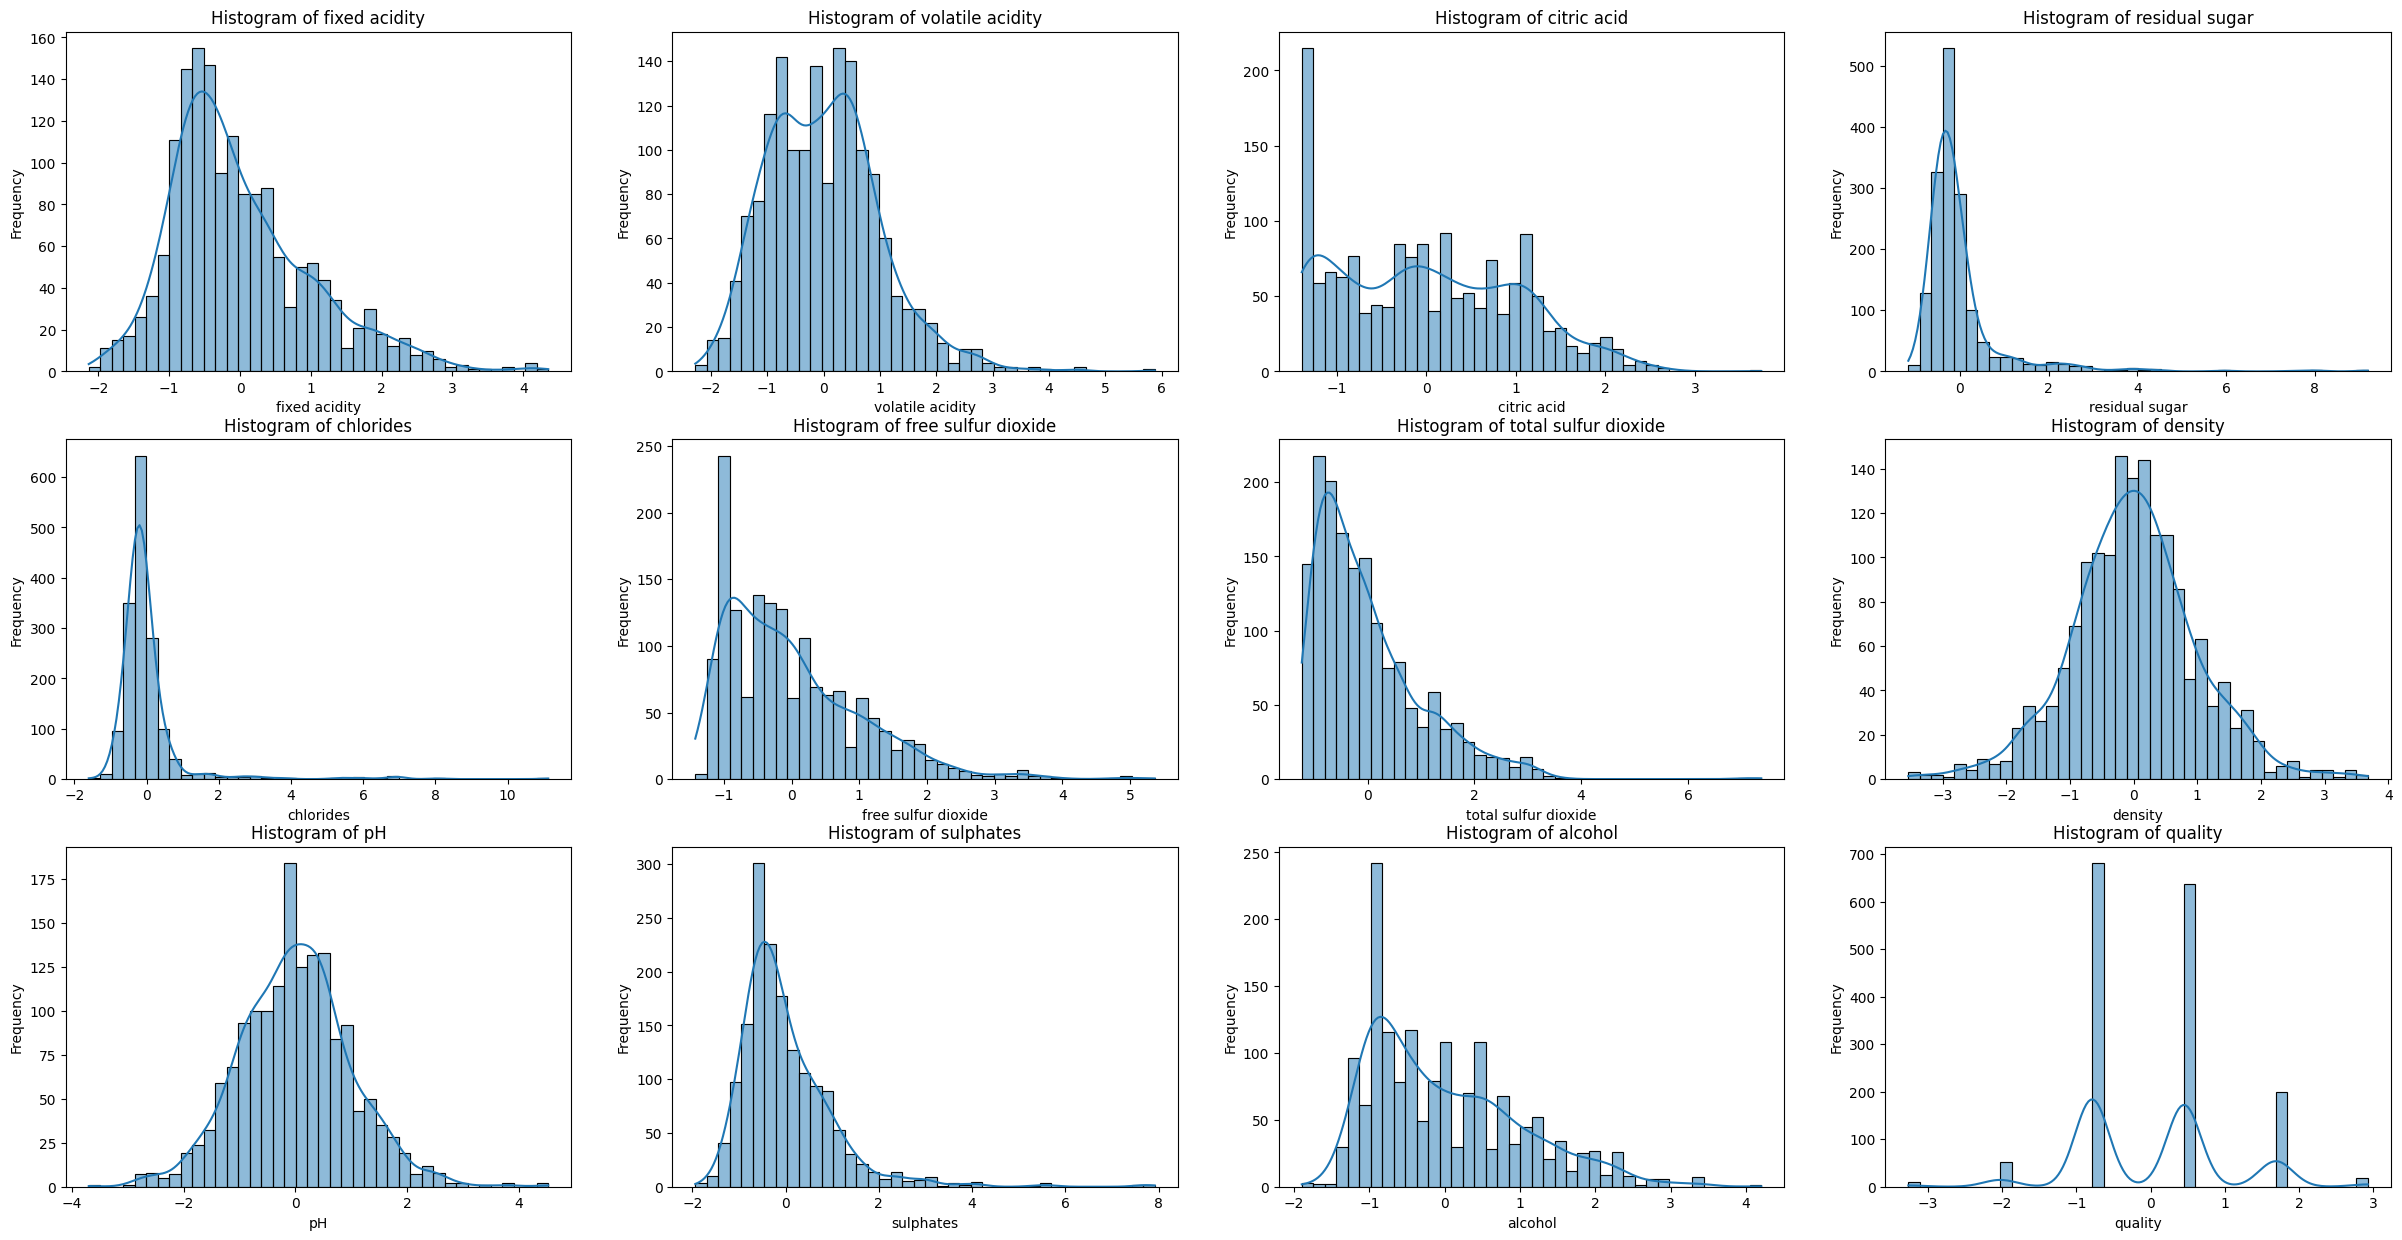

In [295]:
wine_red_std = (wine_red - wine_red.mean()) / (wine_red.std())

plt.subplots(3,4,figsize=(30,15))
for i, column in enumerate(wine_red_std.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(wine_red_std[column], kde=True,bins=40)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

We are basically checking for the normality of the distribution. Looking at the charts, density, total sulfur dioxide, pH, sulphates, fixed acidity all look close to a normal distribution. We can use the Kolmogorov-Smirnov test for these variables to make sure these are normally distributed.

In [296]:
kstest_results = []
for col in wine_red.columns:
    if(col == "quality"):
        break
    statistic, p_value = stats.kstest(wine_red[col], 'norm')
    kstest_results.append({
        "Variable":col,
        "Is Normal":p_value >= 0.01
    })

kstest_df = pd.DataFrame(kstest_results)
kstest_df

Variable  Is Normal
0          fixed acidity      False
1       volatile acidity      False
2            citric acid      False
3         residual sugar      False
4              chlorides      False
5    free sulfur dioxide      False
6   total sulfur dioxide      False
7                density      False
8                     pH      False
9              sulphates      False
10               alcohol      False

Looking at the above table for Kolmogorov-Smirnov test, we can see that none of the variables are normally distributed. We might need this information later in our analysis.

**Boxplots and summaries**

Lets look at the summary of the data.

In [297]:
wine_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

The table provides the mean and standard deviations for the variables, but drawing meaningful conclusions or inferences is difficult without visualizing the data. Instead of examining the boxplots for each variable individually, we can separate the data by wine quality (good vs. bad) and compare the differences in the boxplot distributions between these two categories.

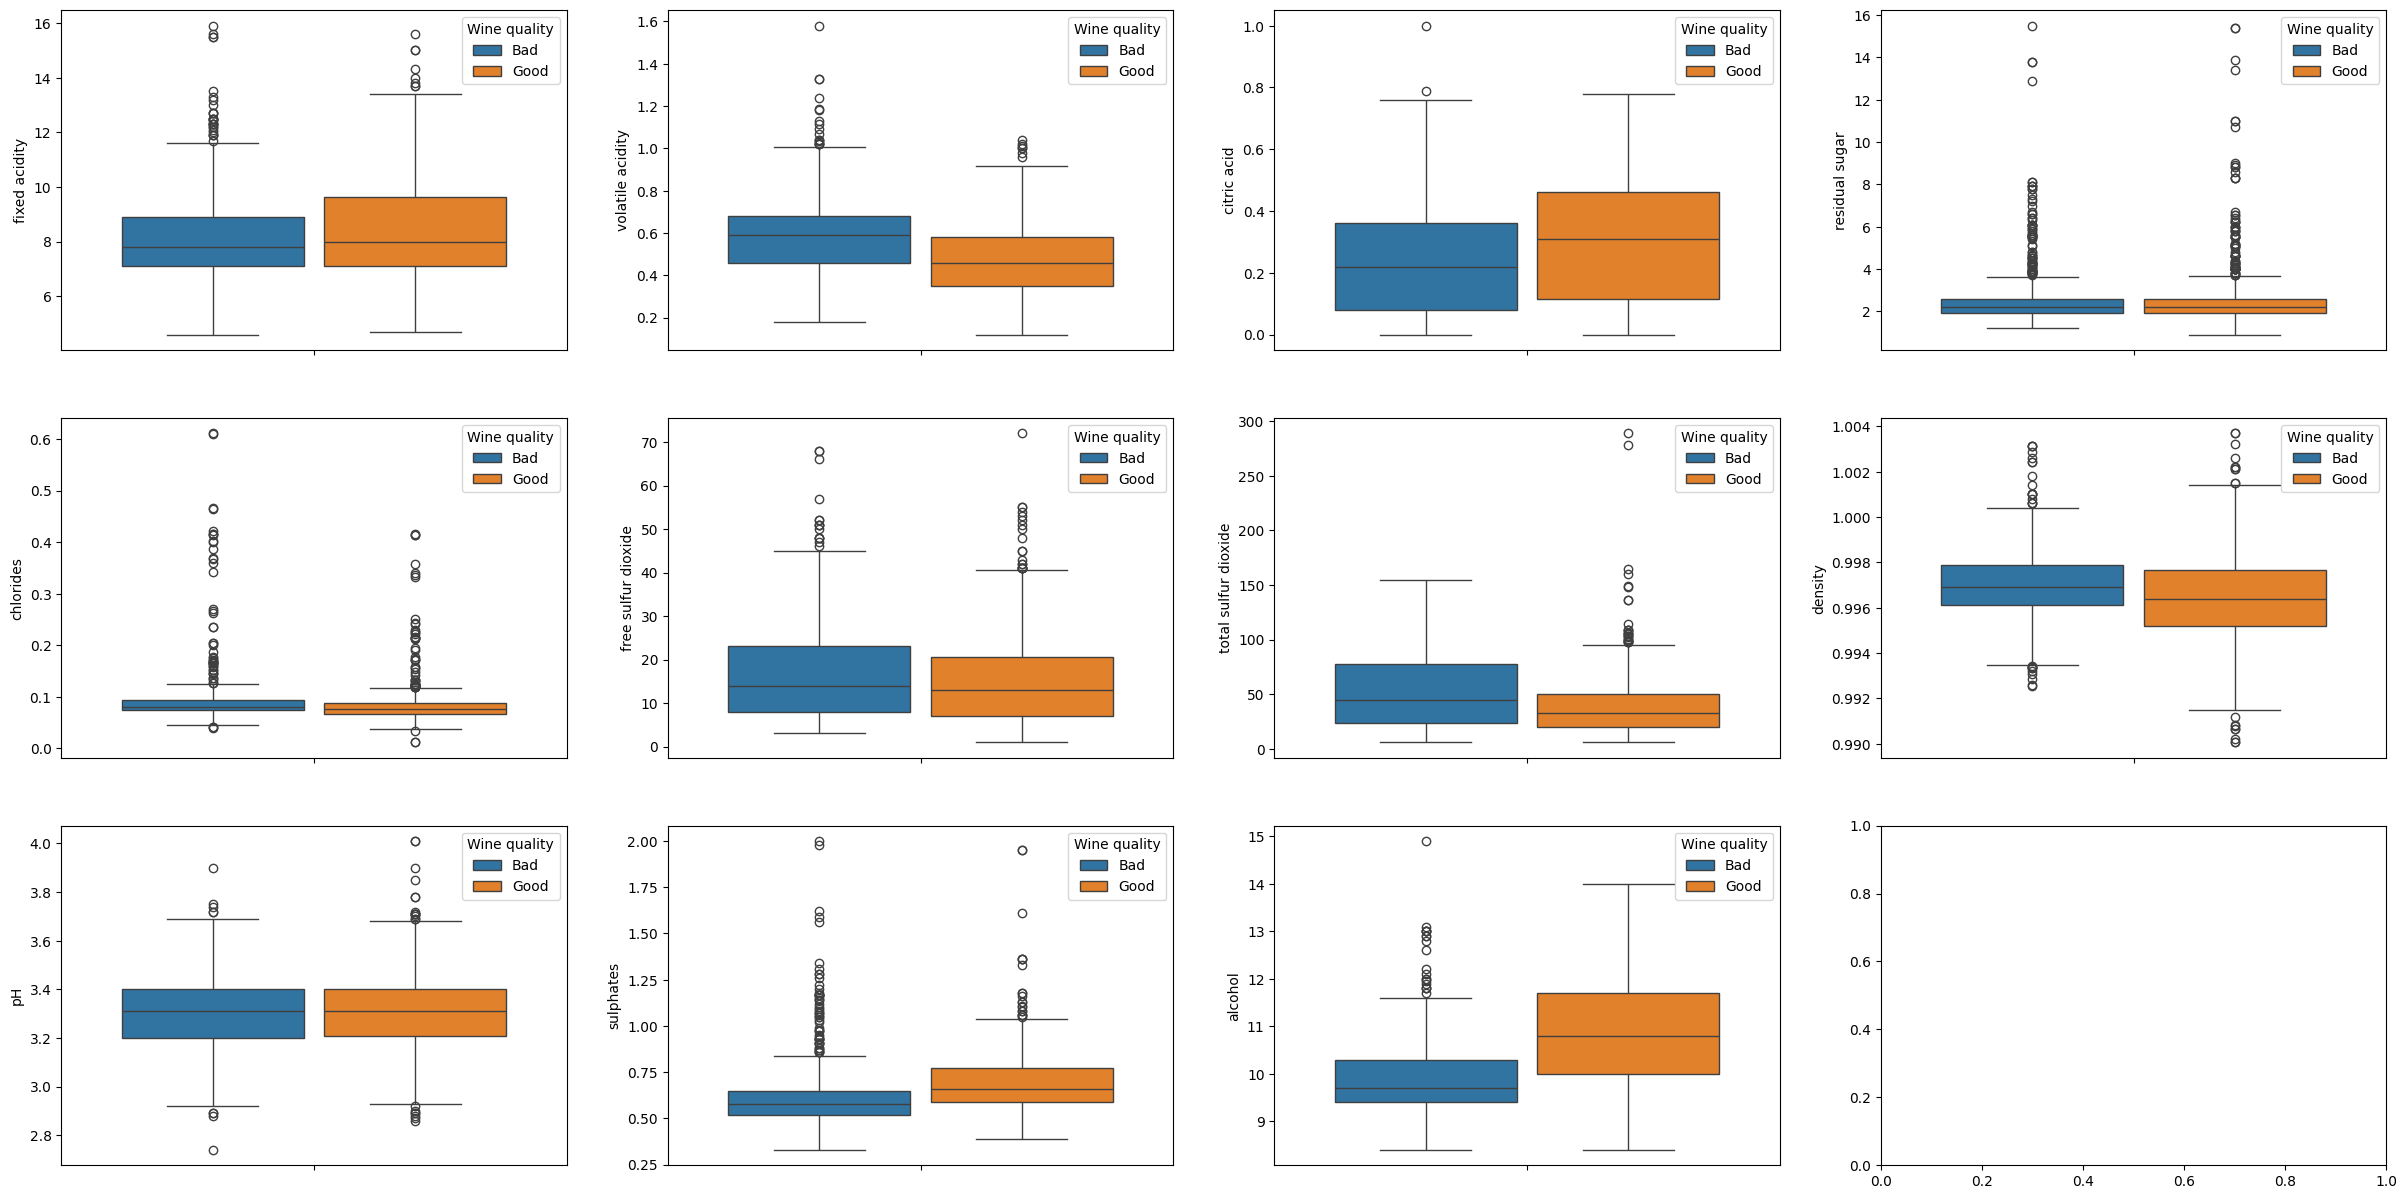

In [298]:
wine_red_quality_added = wine_red.copy()
wine_red_quality_added["Wine quality"] = pd.cut(wine_red["quality"],bins=[0,5,10],labels=["Bad","Good"])

plt.subplots(3,4,figsize=(30,15))
for i, col in enumerate(wine_red.columns):
    if(col != "quality"):
        plt.subplot(3,4,i+1)
        sns.boxplot(data=wine_red_quality_added,y=col,hue="Wine quality",gap=0.1)

The boxplots for all variables, categorized by wine quality (good/bad), reveal some interesting trends. Notably, the alcohol content stands out, with higher alcohol levels observed in good quality wines. Additionally, the higher alcohol values in the bad quality wines are identified as outliers. Other variables, such as total sulfur dioxide, citric acid, volatile acidity, and density, also exhibit distinct distributions. However, their differences are not as pronounced or significant as the variation seen in the alcohol content.

**Correlation Matrix**

Lets look at the correlations for the variables.

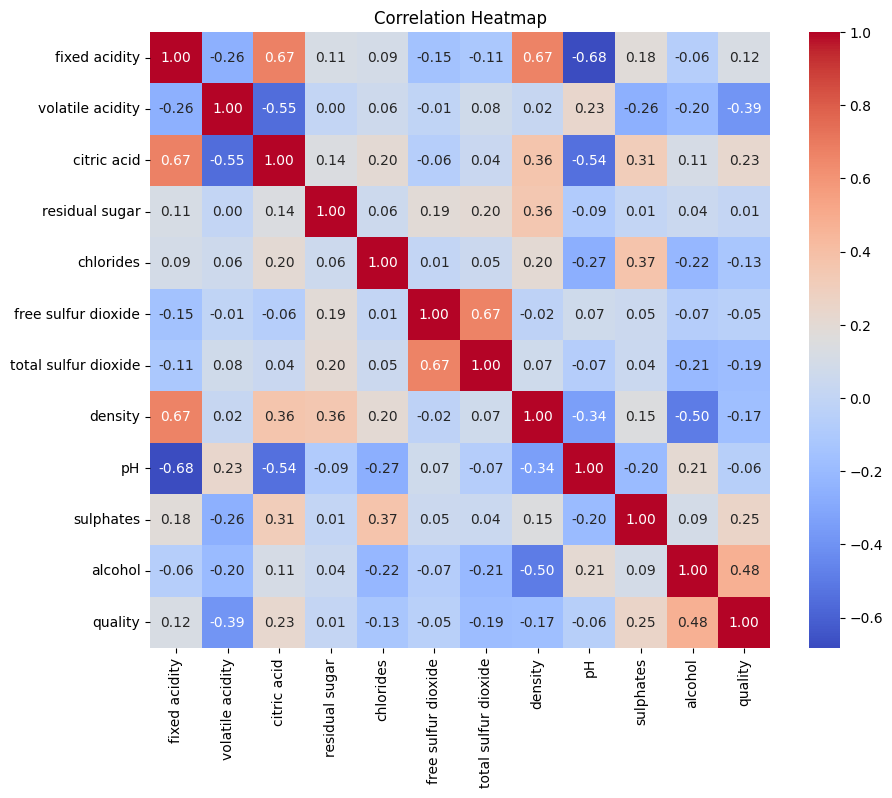

In [299]:
corr_matrix = wine_red.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Correlation heat map reveals the following:

1. pH and fixed acidity - High negative correlation - (-0.68)
2. density and fixed acidity - High positive correlation - (0.67)
3. citric acid and fixed acidity - High positive correlation - (0.67)
4. total sulfur dioxide and free sulfur dioxide - High positive correlation - (0.67)
5. citric acid and volatile acidity - Negative correlation - (-0.55)

These are the top 5 most correlated variables for the red wine dataset.

***

### **Question 2:**

**(a) Load the winequality-white.csv dataset into Python as a pandas DataFrame.**

In [300]:
wine_white = pd.read_csv("winequality-white.csv",delimiter=";")
wine_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

**(b) Inspect the data. How many wines are included in this dataset? Are the indicators the same as those in the red wine group?**

In [301]:
wine_white.shape

(4898, 12)

The white wine dataset has 4898 records of white wines in total with 12 columns(indicators). These are the twelve indicators: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality.

In [302]:
(wine_white.columns == wine_red.columns).sum()

12

Looking at the above result, all 12 indicators are the same as those in red wine dataset.

In [303]:
wine_white.isna().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White wine dataset has no missing values as well.

**(c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the red and the white groups. Use a significance level of $\alpha$ = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.**

Since we already checked that the distributions for the red wine dataset are not normally distributed, we can give a quick test for the white wine dataset.

In [304]:
kstest_results = []
for col in wine_white.columns:
    if(col=="quality"):
        break
    statistic, p_value = stats.kstest(wine_white[col], 'norm')
    kstest_results.append({
        "Variable":col,
        "Is Normal":p_value >= 0.01
    })

kstest_df = pd.DataFrame(kstest_results)
kstest_df

Variable  Is Normal
0          fixed acidity      False
1       volatile acidity      False
2            citric acid      False
3         residual sugar      False
4              chlorides      False
5    free sulfur dioxide      False
6   total sulfur dioxide      False
7                density      False
8                     pH      False
9              sulphates      False
10               alcohol      False

We see that the distributions are not normal for the white wine dataset as well. So to do the t-test for each of the measurements, we use the Mann Whitney U test as it is a non-parametric test which makes no assumptions about the distribution of the data being sampled.

In [305]:
t_test = []
for column in wine_white.columns:
    if(column == "quality"):
        break
    t, p_value = stats.mannwhitneyu(wine_white[column],wine_red[column])
    significance = p_value <= 0.01
    
    t_test.append({
        "Measurement": column,
        "T-Score": t,
        "P-Value": p_value,
        "Significant (p <= 0.01)": significance
    })

t_test_df = pd.DataFrame(t_test)
t_test_df

Measurement    T-Score        P-Value  Significant (p <= 0.01)
0          fixed acidity  1693395.0  1.438930e-255                     True
1       volatile acidity   772278.5   0.000000e+00                     True
2            citric acid  4761813.5   1.312558e-38                     True
3         residual sugar  5262215.0   5.634073e-95                     True
4              chlorides   424886.5   0.000000e+00                     True
5    free sulfur dioxide  6645505.5   0.000000e+00                     True
6   total sulfur dioxide  7465262.5   0.000000e+00                     True
7                density  1772617.5  1.453091e-237                     True
8                     pH  2150062.5  5.472258e-162                     True
9              sulphates  1321941.0   0.000000e+00                     True
10               alcohol  4002858.5   1.818451e-01                    False

The T-scores and corresponding p-values for each measurement are summarized in the table above. At a significance level of $\alpha$ = 0.01, we observe that all p-values are below this threshold, except for the alcohol variable. This indicates that for every measurement other than alcohol, the red and white wine groups exhibit statistically significant differences.

From this analysis, we conclude that the two wine groups differ significantly in all indicators except for alcohol content. This suggests that alcohol is a common factor between the two groups, while the other variables reflect distinct characteristics specific to red and white wines

**(d) Compare the two data sets using appropriate graphical means.**

Let us plot the box plots for the various measurements in the two datasets.

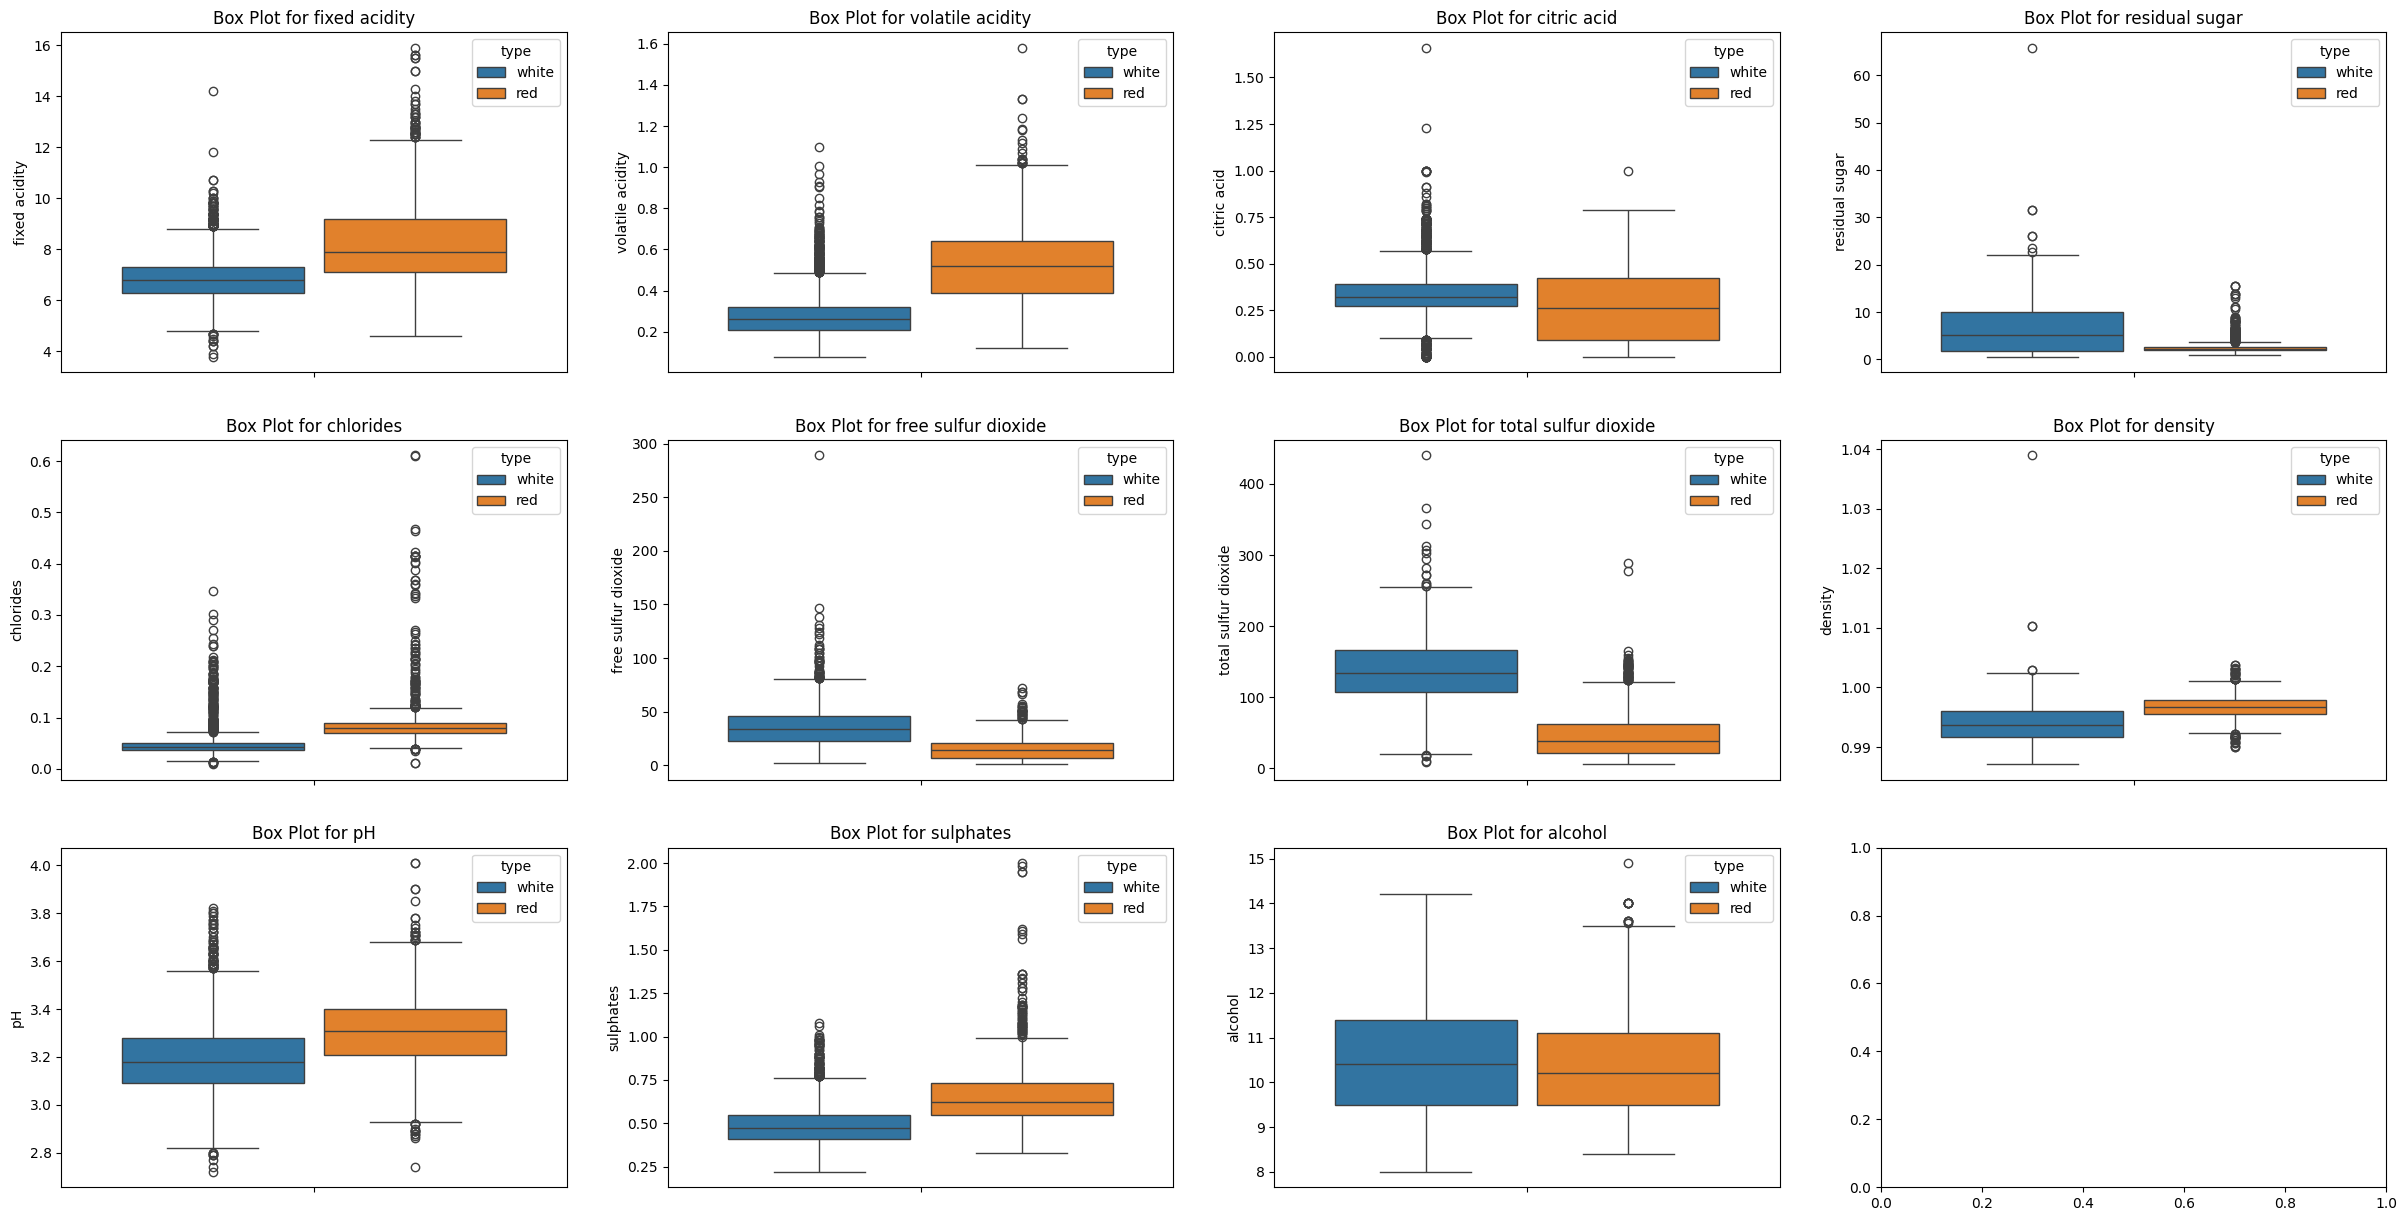

In [306]:
wine_red_type = wine_red.copy()
wine_red_type["type"] = "red"

wine_white_type = wine_white.copy()
wine_white_type["type"] = "white"

wine_combined = pd.concat([wine_white_type,wine_red_type],ignore_index=True)

wine_combined.loc[wine_combined["type"] == "white"]

plt.subplots(3,4,figsize=(30,15))
for i, column in enumerate(wine_combined.columns):
    if(column == "type" or column == "quality"):
        break
    plt.subplot(3,4,i+1)
    sns.boxplot(data = wine_combined, y=column, hue="type",fill=True,gap=0.1)
    plt.title(f'Box Plot for {column}')


The box plots above illustrate the distribution of various measurements for red and white wine types.

1. Measurement Differences by Wine Type:

    Red wine generally exhibits higher values for fixed acidity, volatile acidity, chlorides, density, pH, and sulphates.
    
    Conversely, white wine shows higher levels of free sulfur dioxide and total sulfur dioxide.
2. Alcohol Content:

    Both red and white wines have similar distributions of alcohol content, indicating no significant difference between the two types.
3. Residual Sugar:

    White wine tends to have a higher amount of residual sugar compared to red wine, which typically has lower levels.
4. Citric Acid Levels and Outliers:

    The distribution of citric acid differs noticeably between red and white wines. White wine also displays a significant number of outliers in this category.

### **Question 3**

**(a) Combine the two datasets into a single DataFrame.**

In [307]:
data = pd.concat([wine_red,wine_white],ignore_index=True)
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

The Combined data has 6497 records of wines with 12 columns.

**(b) Compute the Pearson correlation coefficient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs.**

In [308]:
correlation_matrix = data.corr(method="pearson")

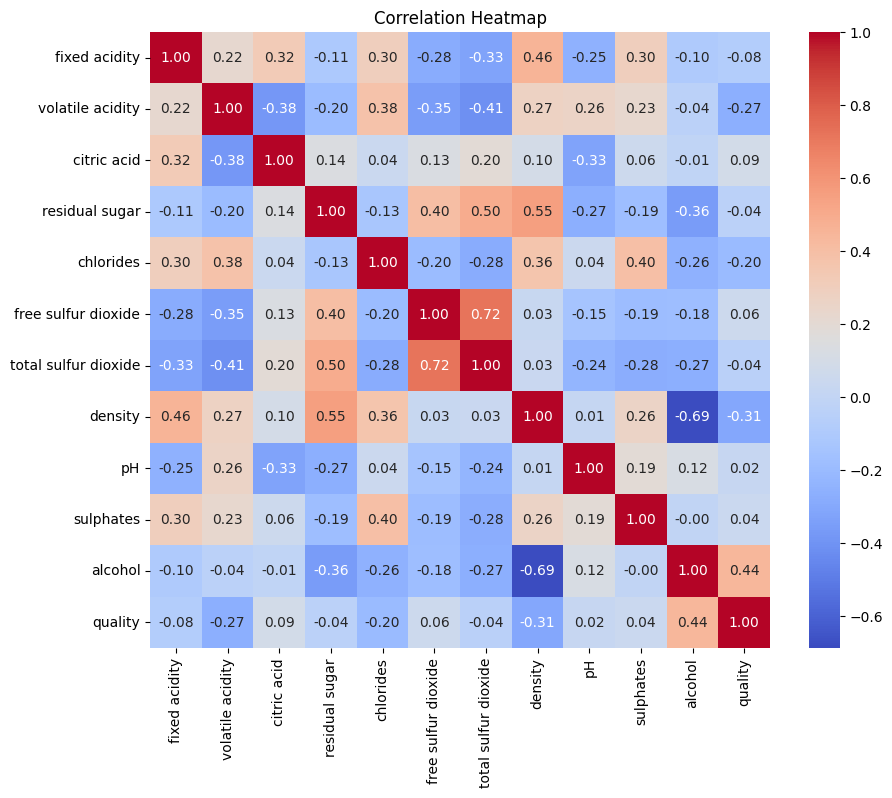

In [309]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

The top 4 most correlated variables:

1. total sulfur dioxide & free sulfur dioxide - 0.720934

2. alcohol & density - -0.6867

3. density & residual sugar - 0.552517
    
4. total sulfur dioxide & residual sugar - 0.495482

**(c) Create scatter plots for the each of the correlated pairs identified in Q3(b). Are the relationships as expected from the correlation coefficients?**

(0.0, 30.0)

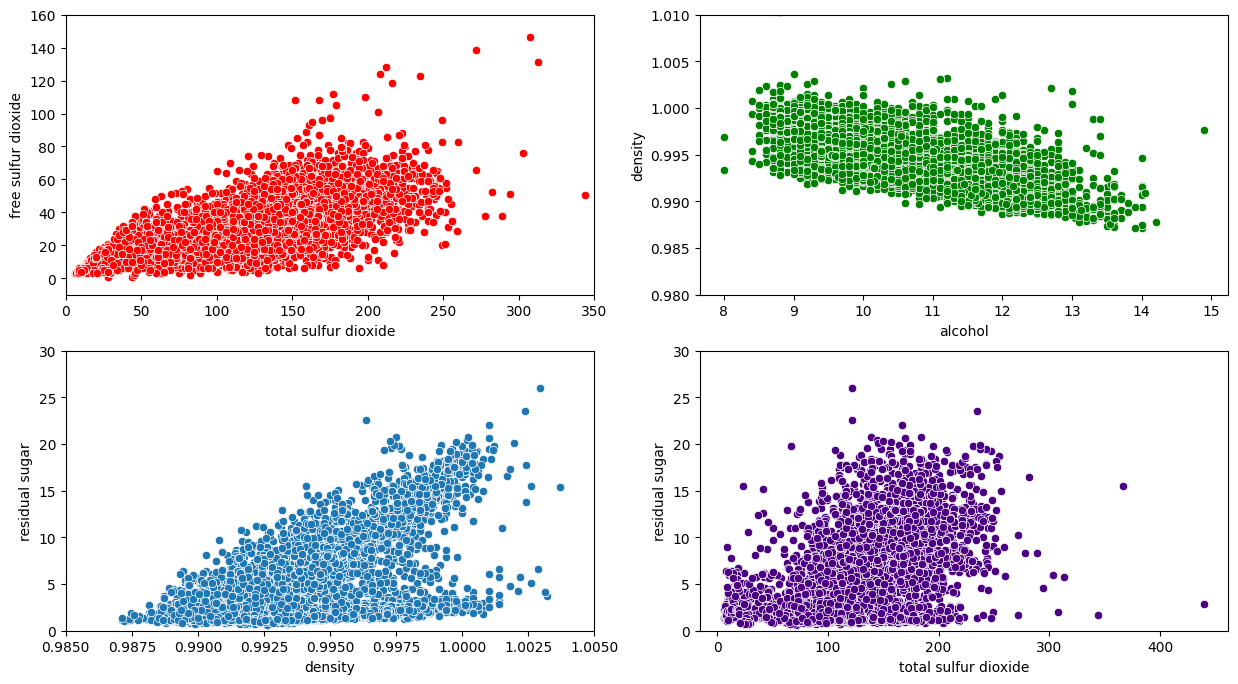

In [310]:
plt.subplots(2,2,figsize=(15,8))

plt.subplot(2,2,1)
ax = sns.scatterplot(data=data, x="total sulfur dioxide", y="free sulfur dioxide", color="red")
ax.set_ylim(-10,160)
ax.set_xlim(0,350)

plt.subplot(2,2,2)
ax = sns.scatterplot(data=data, x="alcohol", y="density", color="green")
ax.set_ylim(0.98,1.01)

plt.subplot(2,2,3)
ax = sns.scatterplot(data=data, x="density", y="residual sugar")
ax.set_xlim(0.985, 1.005)
ax.set_ylim(0,30)

plt.subplot(2,2,4)
ax = sns.scatterplot(data=data, x="total sulfur dioxide", y="residual sugar", color="indigo")
ax.set_ylim(0,30)

The scatterplots are as expected from the correlation charts.

Chart - 1 : Total sulfur dioxide & Free sulfur dioxide - Positive correlation

Chart - 2 : Alcohol & Density - Negative correlation

Chart - 3 : Density & Residual Sugar - Positive correlation

Chart - 4 : Total sulfur dioxide & Residual sugar - Positive correlation

### Question 4

*Linear regression to predict wine quality*

*(Wine quality scores to be used as dependent variable)*

In [311]:
import statsmodels.api as sm

**(a) We consider wine with a quality score from 0 to 5 as being POOR, while quality scores from 6-10 are considered GOOD. Create a new column in the dataframe indicating whether the wine is POOR or GOOD**

In [312]:
data["Wine Quality"] = pd.cut(data["quality"],[0,5,10],labels=["Poor","Good"])
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality Wine Quality  
0      9.4        5         Poor  
1      9.8        5         Poor  
2      9.8        5         Poor  
3      9.8        6         Good  
4      9.4        5         Poor

**(b) Separate the data into response and predictor variables and standardise the predictor variables.**

In [313]:
Y = data["quality"]
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [314]:
X = data.iloc[:,0:data.shape[1]-2]

X_std = (X - X.mean()) / (X.std())
X_std = sm.add_constant(X_std)
X_std.head()

const  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    1.0       0.142462          2.188664    -2.192664       -0.744721   
1    1.0       0.451001          3.281982    -2.192664       -0.597594   
2    1.0       0.451001          2.553104    -1.917405       -0.660648   
3    1.0       3.073580         -0.362411     1.660957       -0.744721   
4    1.0       0.142462          2.188664    -2.192664       -0.744721   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.569914            -1.100055             -1.446247  1.034913  1.812950   
1   1.197883            -0.311296             -0.862402  0.701432 -0.115064   
2   1.026618            -0.874695             -1.092402  0.768128  0.258100   
3   0.541370            -0.762016             -0.986248  1.101609 -0.363840   
4   0.569914            -1.100055             -1.446247  1.034913  1.812950   

   sulphates   alcohol  
0   0.193082 -0.915394  
1   0.999502 -0.580023  
2   0.797897 -0.580023  
3   0.327485 -0.580023  
4   0.193082 -0.915394

**(c) Fit a linear regression model and interpret the fitted model.**

In [315]:
model = sm.OLS(Y,X_std).fit()
print(model.aic)
model.summary()

14454.901700233566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:48:19   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8184      0.009    637.785      0.000       5.800       5.836
fixed acidity            0.0877      0.020      4.346      0.000       0.048       0.127
volatile acidity        -0.2186      0.013    -17.162      0.000      -0.244      -0.194
citric acid             -0.0159      0.012     -1.377      0.168      -0.039       0.007
residual sugar           0.2072      0.025      8.449      0.000       0.159       0.255
chlorides               -0.0169      0.012     -1.454      0.146      -0.040       0.006
free sulfur dioxide      0.1060      0.013      7.948      0.000       0.080       0.132
total sulfur dioxide    -0.1402      0.016     -8.969      0.000      -0.171      -0.110
density                 -0.1648      0.036     -4.529      0.000      -0.236      -0.093
pH                       0.0706      0.015      4.861      0.000       0.042       0.099
sulphates                0.1143      0.011     10.092      0.000       0.092       0.137
alcohol                  0.3185      0.020     15.963      0.000       0.279       0.358
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
model.pvalues

const                   0.000000e+00
fixed acidity           1.406093e-05
volatile acidity        1.336005e-64
citric acid             1.684750e-01
residual sugar          3.603699e-17
chlorides               1.460010e-01
free sulfur dioxide     2.224561e-15
total sulfur dioxide    3.859922e-19
density                 6.041018e-06
pH                      1.195226e-06
sulphates               8.951638e-24
alcohol                 2.689724e-56
dtype: float64

Model Interpretation:

1. For a 1 unit increase in **fixed acidity** the quality increases by 0.0877 units.
2. For a 1 unit increase in **volatile acidity** the quality decreases by 0.2186 units.
3. For a 1 unit increase in **citric acid** the quality decreasees by 0.0159 units.
4. For a 1 unit increase in **residual sugar** the quality increases by 0.2072 units.
5. For a 1 unit increase in **chlorides** the quality decreases by 0.0169 units.
6. For a 1 unit increase in **free sulfur dioxide** the quality increases by 0.1060 units.
7. For a 1 unit increase in **total sulfur dioxide** the quality decreases by 0.1402 units.
8. For a 1 unit increase in **density** the quality decreases by 0.0706 units.
9. For a 1 unit increase in **pH** the quality increases by 0.2072 units.
10. For a 1 unit increase in **sulphates** the quality increases by 0.1143 units.
11. For a 1 unit increase in **alcohol** the quality increases by 0.3185 units.

The t values and their probabilities show which of the variables are shown above.
Low p-values, usually less than 0.05 indicate that the corresponding variable affects the output significantly.

We see here that p value for every variable is less than 0.05 except for citric acid - 0.168 and chlorides - 0.146. Except for those variables, all other variables contribute significantly to quality.

R2 value = 0.292.

**(d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b).**

In [317]:
model_new = sm.OLS(Y,X_std.iloc[:,0:1]).fit()

base_aic = model_new.aic
best_model = ["const"]

columns = X_std.columns

cols = best_model
while True:
    best_aic = base_aic
    best_cols = best_model
    for i in range(len(columns)):
        if(columns[i] not in best_model):
            cols = [*best_model,columns[i]]
            temp = X_std.loc[:,cols]
            model_new = sm.OLS(Y,temp).fit()

            aic = model_new.aic

            if(aic < best_aic):
                best_aic = aic
                best_cols = cols
    
    if(best_cols == best_model):
        break
    
    base_aic = best_aic
    best_model = best_cols

print(best_cols,best_aic)


['const', 'alcohol', 'volatile acidity', 'sulphates', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'pH', 'density', 'fixed acidity'] 14454.801816402778


The model selected here differs from the one fitted in (b) and has a slightly lower AIC value, indicating a better fit. The best model identified through the forward selection algorithm excludes the citric acid column and has an AIC value of 14454.801816. In contrast, the full model fitted in (b) has an AIC value of 14454.901700. The forward selection algorithm successfully identified the global optimum in this case.

In [318]:
data = data.iloc[:,0:-1]

### Question 5:

*Random forest regression to predict the quality of a wine.*

*(Remaining indicators to be used as predictor variables.)*

**(a) Split the data into appropriate training and test sets.**

In [319]:
train_size = 4500
train_select = np.random.permutation(range(len(Y)))

X_train = X.iloc[train_select[:train_size],:]
X_test = X.iloc[train_select[train_size:],:]

Y_train = Y.iloc[train_select[:train_size],]
Y_test = Y.iloc[train_select[train_size:],]

**(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the quality of a wine. Discuss your findings in relation to the linear model’s fit in question 4.**

In [320]:
from sklearn.ensemble import RandomForestRegressor

In [321]:
model_rf = RandomForestRegressor(n_estimators=10,random_state=101)
model_rf.fit(X_train,Y_train)

feature_importances = pd.DataFrame({"Feature":model_rf.feature_names_in_,"Importances":model_rf.feature_importances_ * 100}).sort_values("Importances")
feature_importances

Feature  Importances
0          fixed acidity     5.542858
7                density     5.627511
8                     pH     6.197162
2            citric acid     6.345032
4              chlorides     6.355561
6   total sulfur dioxide     6.874465
3         residual sugar     7.159769
9              sulphates     7.380244
5    free sulfur dioxide     9.726175
1       volatile acidity    12.956018
10               alcohol    25.835204

Based on the feature importances provided by the RandomForestRegressor, the variables are ranked from least to most important. The variables alcohol, volatile acidity, sulphates, and free sulfur dioxide show relatively higher importance, indicating they contribute more significantly to predicting wine quality.

When comparing this to the linear model, the p-values for all variables, except citric acid and chlorides, were below 0.05, suggesting that chlorides and citric acid do not significantly affect wine quality. 

Consistent with this, the feature importance from the RandomForestRegressor indicates that citric acid is the least important variable, while chlorides also have a relatively low importance.

**(c) Use the random forest regression model to predict the quality of a wine for the test set. Create a scatter plot of the true quality versus the predicted one. Interpret your plot.**

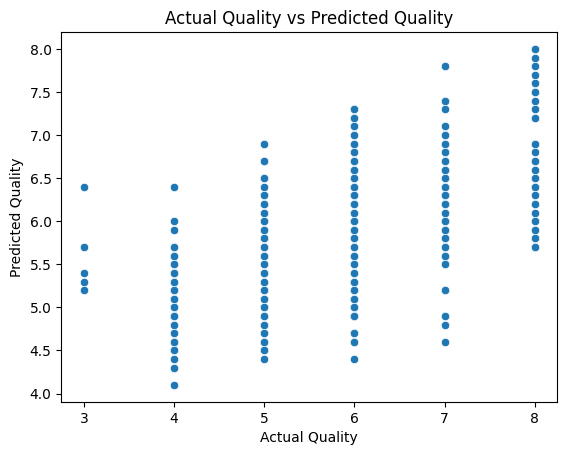

In [322]:
model_rf_pred = model_rf.predict(X_test)
new_df = pd.DataFrame({"Y":Y_test,"Pred":model_rf_pred})

sns.scatterplot(data = new_df,x="Y",y="Pred")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual Quality vs Predicted Quality")
plt.show()

This scatterplot illustrates the relationship between actual wine quality and predicted quality as determined by the RandomForestRegressor. From the plot, it is evident that there is noticeable variation in the predicted values compared to the actual quality. For instance, at an actual quality of 4, the predicted values range approximately from 4 to 7. Similar patterns of variation are observed for other actual quality levels as well, indicating some inconsistency in the model’s predictions.

**(d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the quality of a wine. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.**

In [323]:
trees = [5,10,50,100,500,1000,5000]

result = {} 

for tree in trees:
    for i in range(20):
        model_rf_new = RandomForestRegressor(n_estimators=tree)
        model_rf_new.fit(X_train,Y_train)
        
        if(tree in result.keys()):
            result[tree].append(model_rf_new.score(X_test,Y_test))
        else:
            result[tree] = []
            result[tree].append(model_rf_new.score(X_test,Y_test))

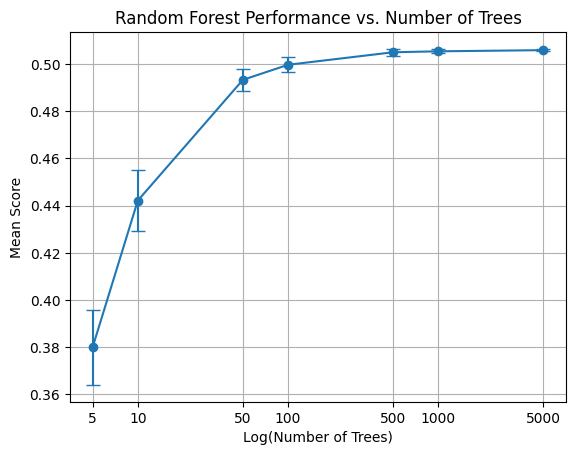

In [324]:
result_df = pd.DataFrame(result)
result_df.mean()
means = []
std = []

for key,value in result.items():
    means.append(np.mean(value))
    std.append(np.std(value))

trees_log = np.log10(trees)

plt.errorbar(trees_log, means, yerr=std, fmt='-o', capsize=5)
plt.xlabel("Log(Number of Trees)")
plt.ylabel("Mean Score")
plt.title("Random Forest Performance vs. Number of Trees")
plt.xticks(trees_log, trees)
plt.grid()
plt.show()

This is the plot for the random forest performance vs Number of trees. For model with 5 trees, the performance is around 0.41. As we increase the number of trees, the performance increases. The performance starts slowing down at 100 trees, with a value of around 0.51 with little to no improvement after 1000 trees.

**(e) Explain the rationale for fitting the model multiple times with different random states.**

When using a RandomForestRegressor, the results can vary each time the model is fitted due to the inherent randomness in its algorithm. To account for this variability, we fit the model multiple times with different random states to understand the range of possible outcomes.

For each specified number of trees, we fit the model 20 times, storing the results of these experiments. We then calculate the mean and standard deviation of the performance metrics across these 20 runs and plot the results. This process is repeated for increasing numbers of trees. By doing so, we can observe the performance range for each tree count, providing a clearer picture of how the model's stability and accuracy change as the number of trees increases.

### Question 6

*Clustering algorithms to identify different wine groups*

**(a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.**

In [325]:
from sklearn.cluster import KMeans

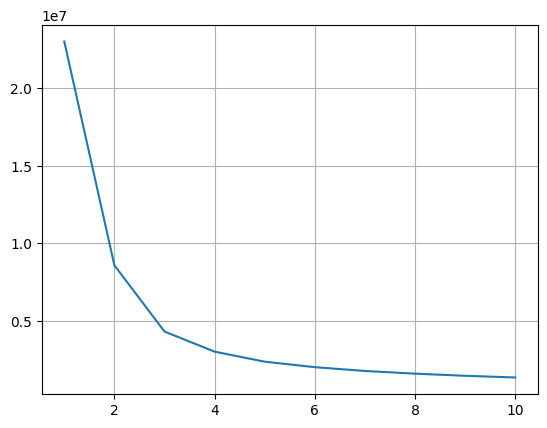

In [326]:
inertias = []
k = []

for i in range(1,11):
    KMeans_model = KMeans(n_clusters=i)
    KMeans_model.fit(data)
    k.append(i)
    inertias.append(KMeans_model.inertia_)

plt.plot(k,inertias)
plt.grid(True)

The optimal value is 3 from the elbow method.

**(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part(a)), and identify the most discriminatory variables.**

*Hint: Create histograms for each variable, with the data separated by cluster.)*

In [327]:
KMeans_model = KMeans(n_clusters=3)
KMeans_model.fit(data)

KMeans(n_clusters=3)

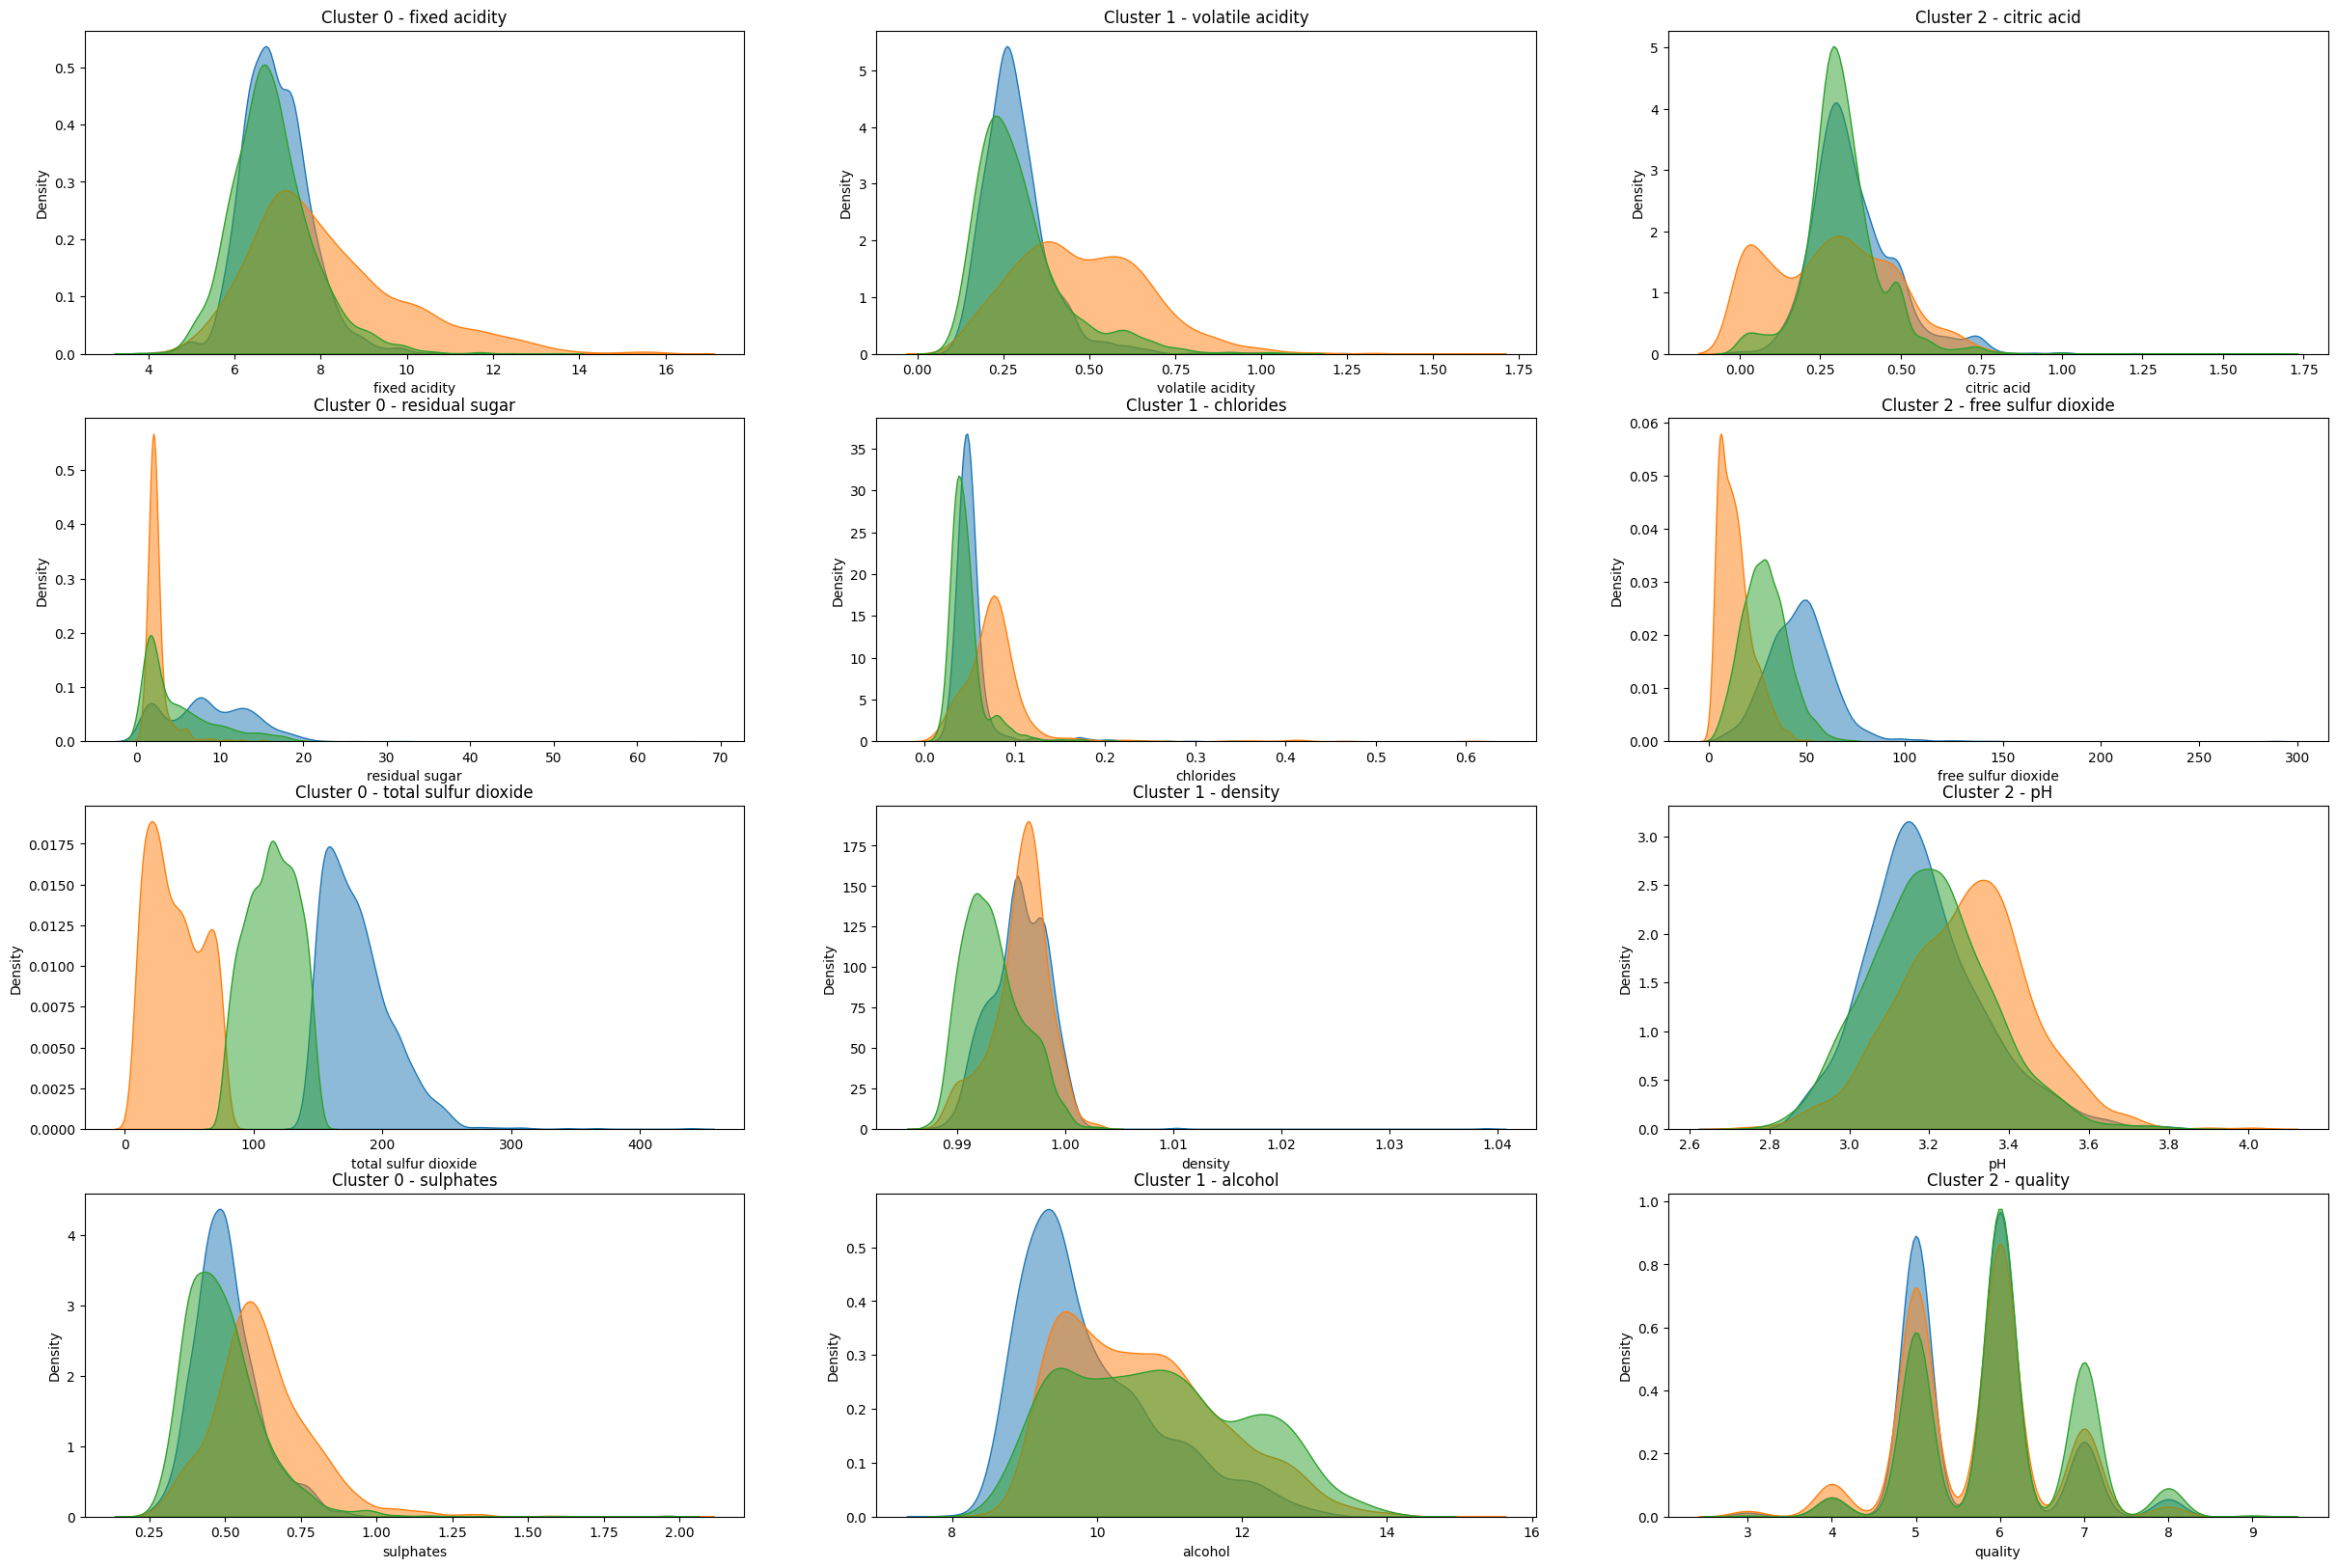

In [328]:
data_labels = data.merge(pd.DataFrame({"Labels":KMeans_model.labels_}),left_index=True,right_index=True)

bins = 40
number_of_columns = len(data_labels.columns)
number_of_clusters = 3
colors = ["blue","red","green","indigo"]

count = 1
plt.subplots(4,3,figsize=(30,20))

for i in range(number_of_columns - 1):
    for j in range(number_of_clusters):
        plt.subplot(4,3,count)
        sns.kdeplot(data=data_labels.loc[data_labels["Labels"]==j],x=data_labels.columns[i], alpha=0.5, fill=True)
        plt.title(f"Cluster {(count-1)%number_of_clusters} - {data_labels.columns[i]}")

    count += 1

Above are the density plots for all the variables separated by clusters. From this, we can see which are the most discriminatory variables by looking at the variation in the distribution. Looking at the plots, we can see that the most discriminatory variable is the total sulfur dioxide variable since its density distribution changes for each cluster. Distribution for free sulfur dioxide is slightly different for each clusters but not as significant as total sulfur dioxide.

**(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings.**

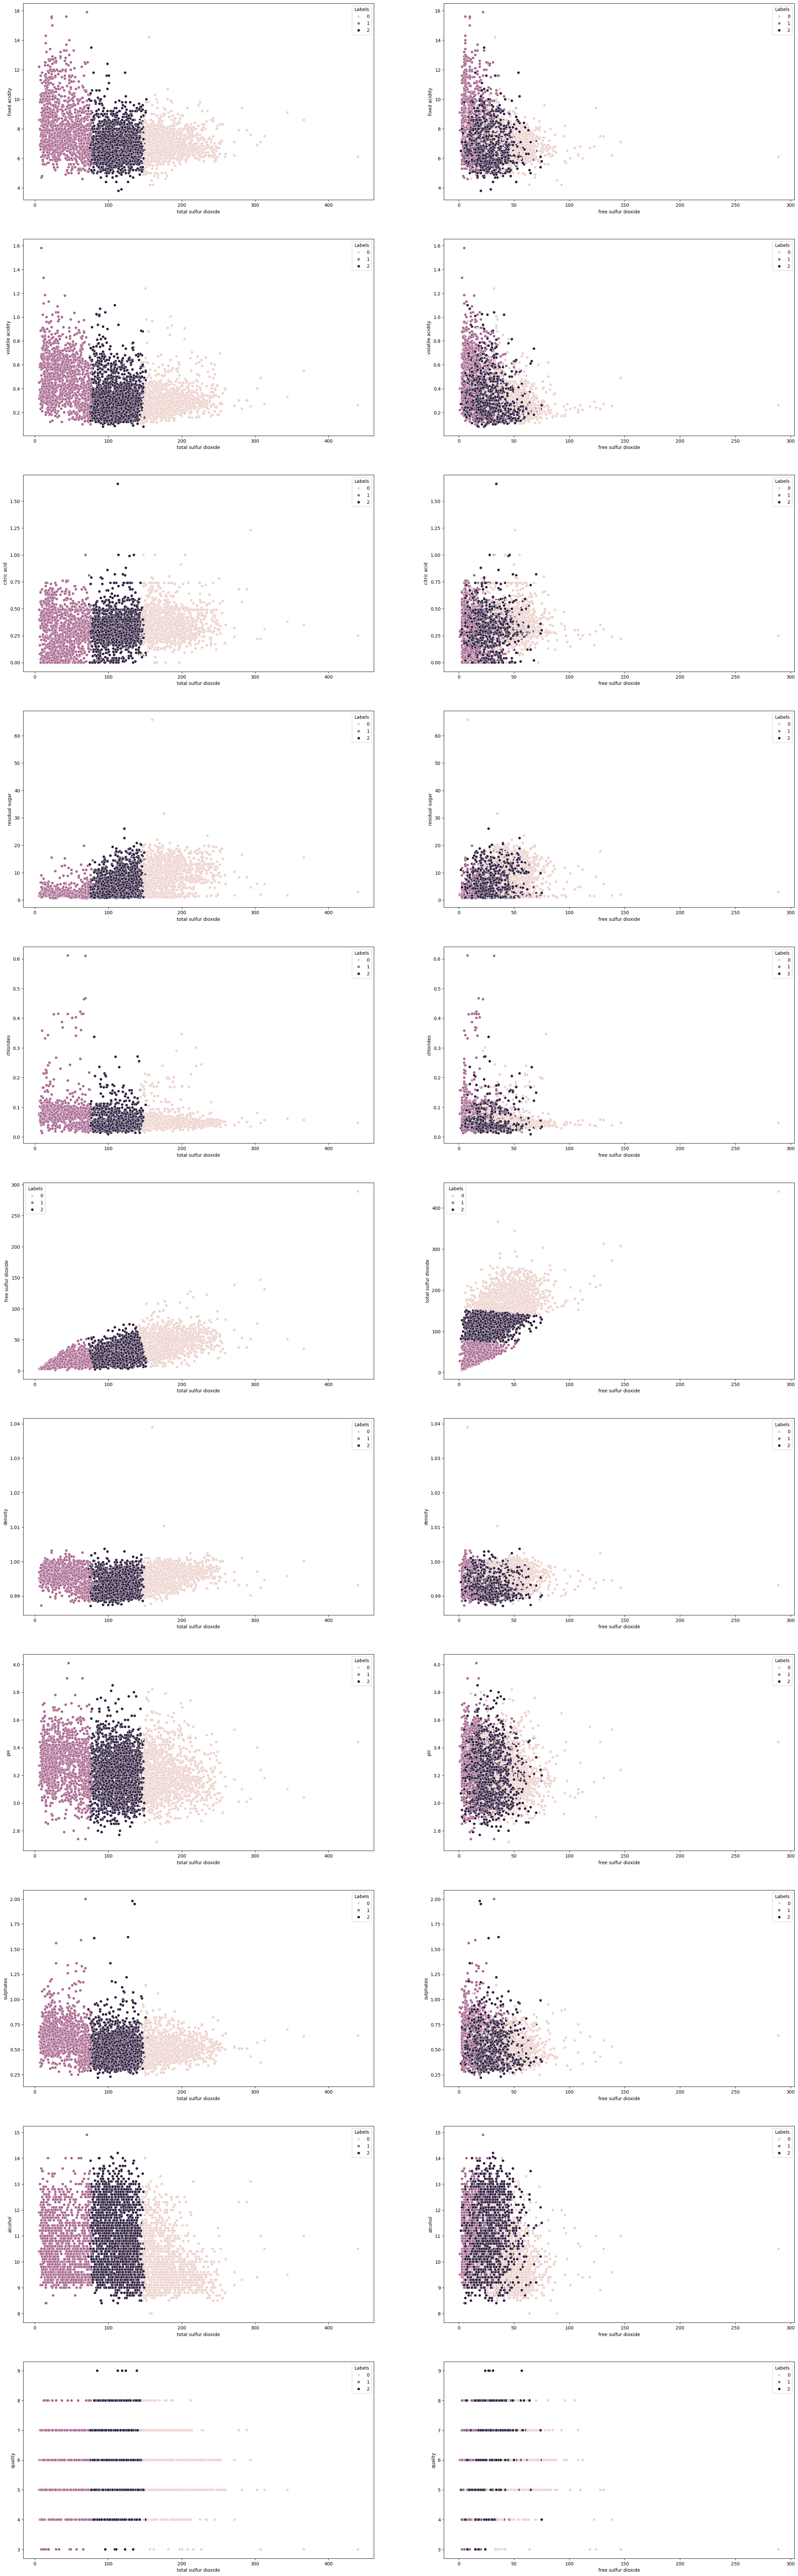

In [329]:
discriminatory_variables = ["total sulfur dioxide","free sulfur dioxide"]

plt.subplots(number_of_columns - 2,len(discriminatory_variables),figsize=(30,100))

count = 1

for j in range(len(discriminatory_variables)):
    count = 1
    for i in range(number_of_columns - 1):
        if(discriminatory_variables[j] != data_labels.columns[i]):
            plt.subplot(number_of_columns - 2,len(discriminatory_variables),count + j)
            ax = sns.scatterplot(data=data_labels, x=discriminatory_variables[j], y=data_labels.columns[i], hue="Labels")
            count += 2

These are the series of scatter plots for the three most discriminatory variables against all other variables. We can clearly see that the clustering is very clearly visible when plotted against total sulfur dioxide variable. This means that this variable plays a significant role in clustering the data. The clustering is also quiet visible in the case of free sulphur dioxide but not as good as total sulfur dioxide. This concludes that total sulfur dioxide is the key driver of the clustering process.

**(d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis.**

Let us take a look at another clustering algorithm here. I am choosing to take a look at BIRCH algorithm also known as Balanced Iterative Reducing and Clustering using Hierarchies which is generally faster than K-Means clustering for larger datasets. This is usually used when the dataset is too big to fit into memory. This algorithm is typically used as a pre-clustering step, and the results can be further filtered and refined by using K-means or other clustering methods.

BIRCH is designed to handle large datasets by summarizing the data into a compact structure called the Clustering Feature Tree (CF Tree). It incrementally builds this tree by scanning the data once, making it scalable and efficient for large datasets. This means that it can cluster without actually loading the whole dataset into memory at once.

One point to note here is that BIRCH sacrifices some accuracy for speed on larger datasets. This is why it is used as a pre-clustering step as mentioned above. So we can use this if we need a fast approximation for the clustering for very large datasets.

Let us look at an implementation for the algorithm.

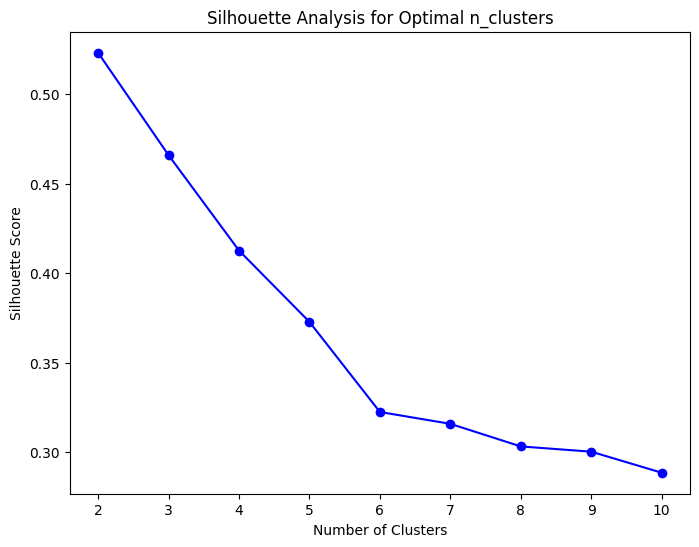

In [330]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    birch = Birch(n_clusters=n_clusters)
    labels = birch.fit_predict(data)
    
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal n_clusters')
plt.show()

The silhouette score analysis shows the optimal clusters is 2.

In [331]:
birch = Birch(n_clusters=2)
birch.fit(data)

Birch(n_clusters=2)

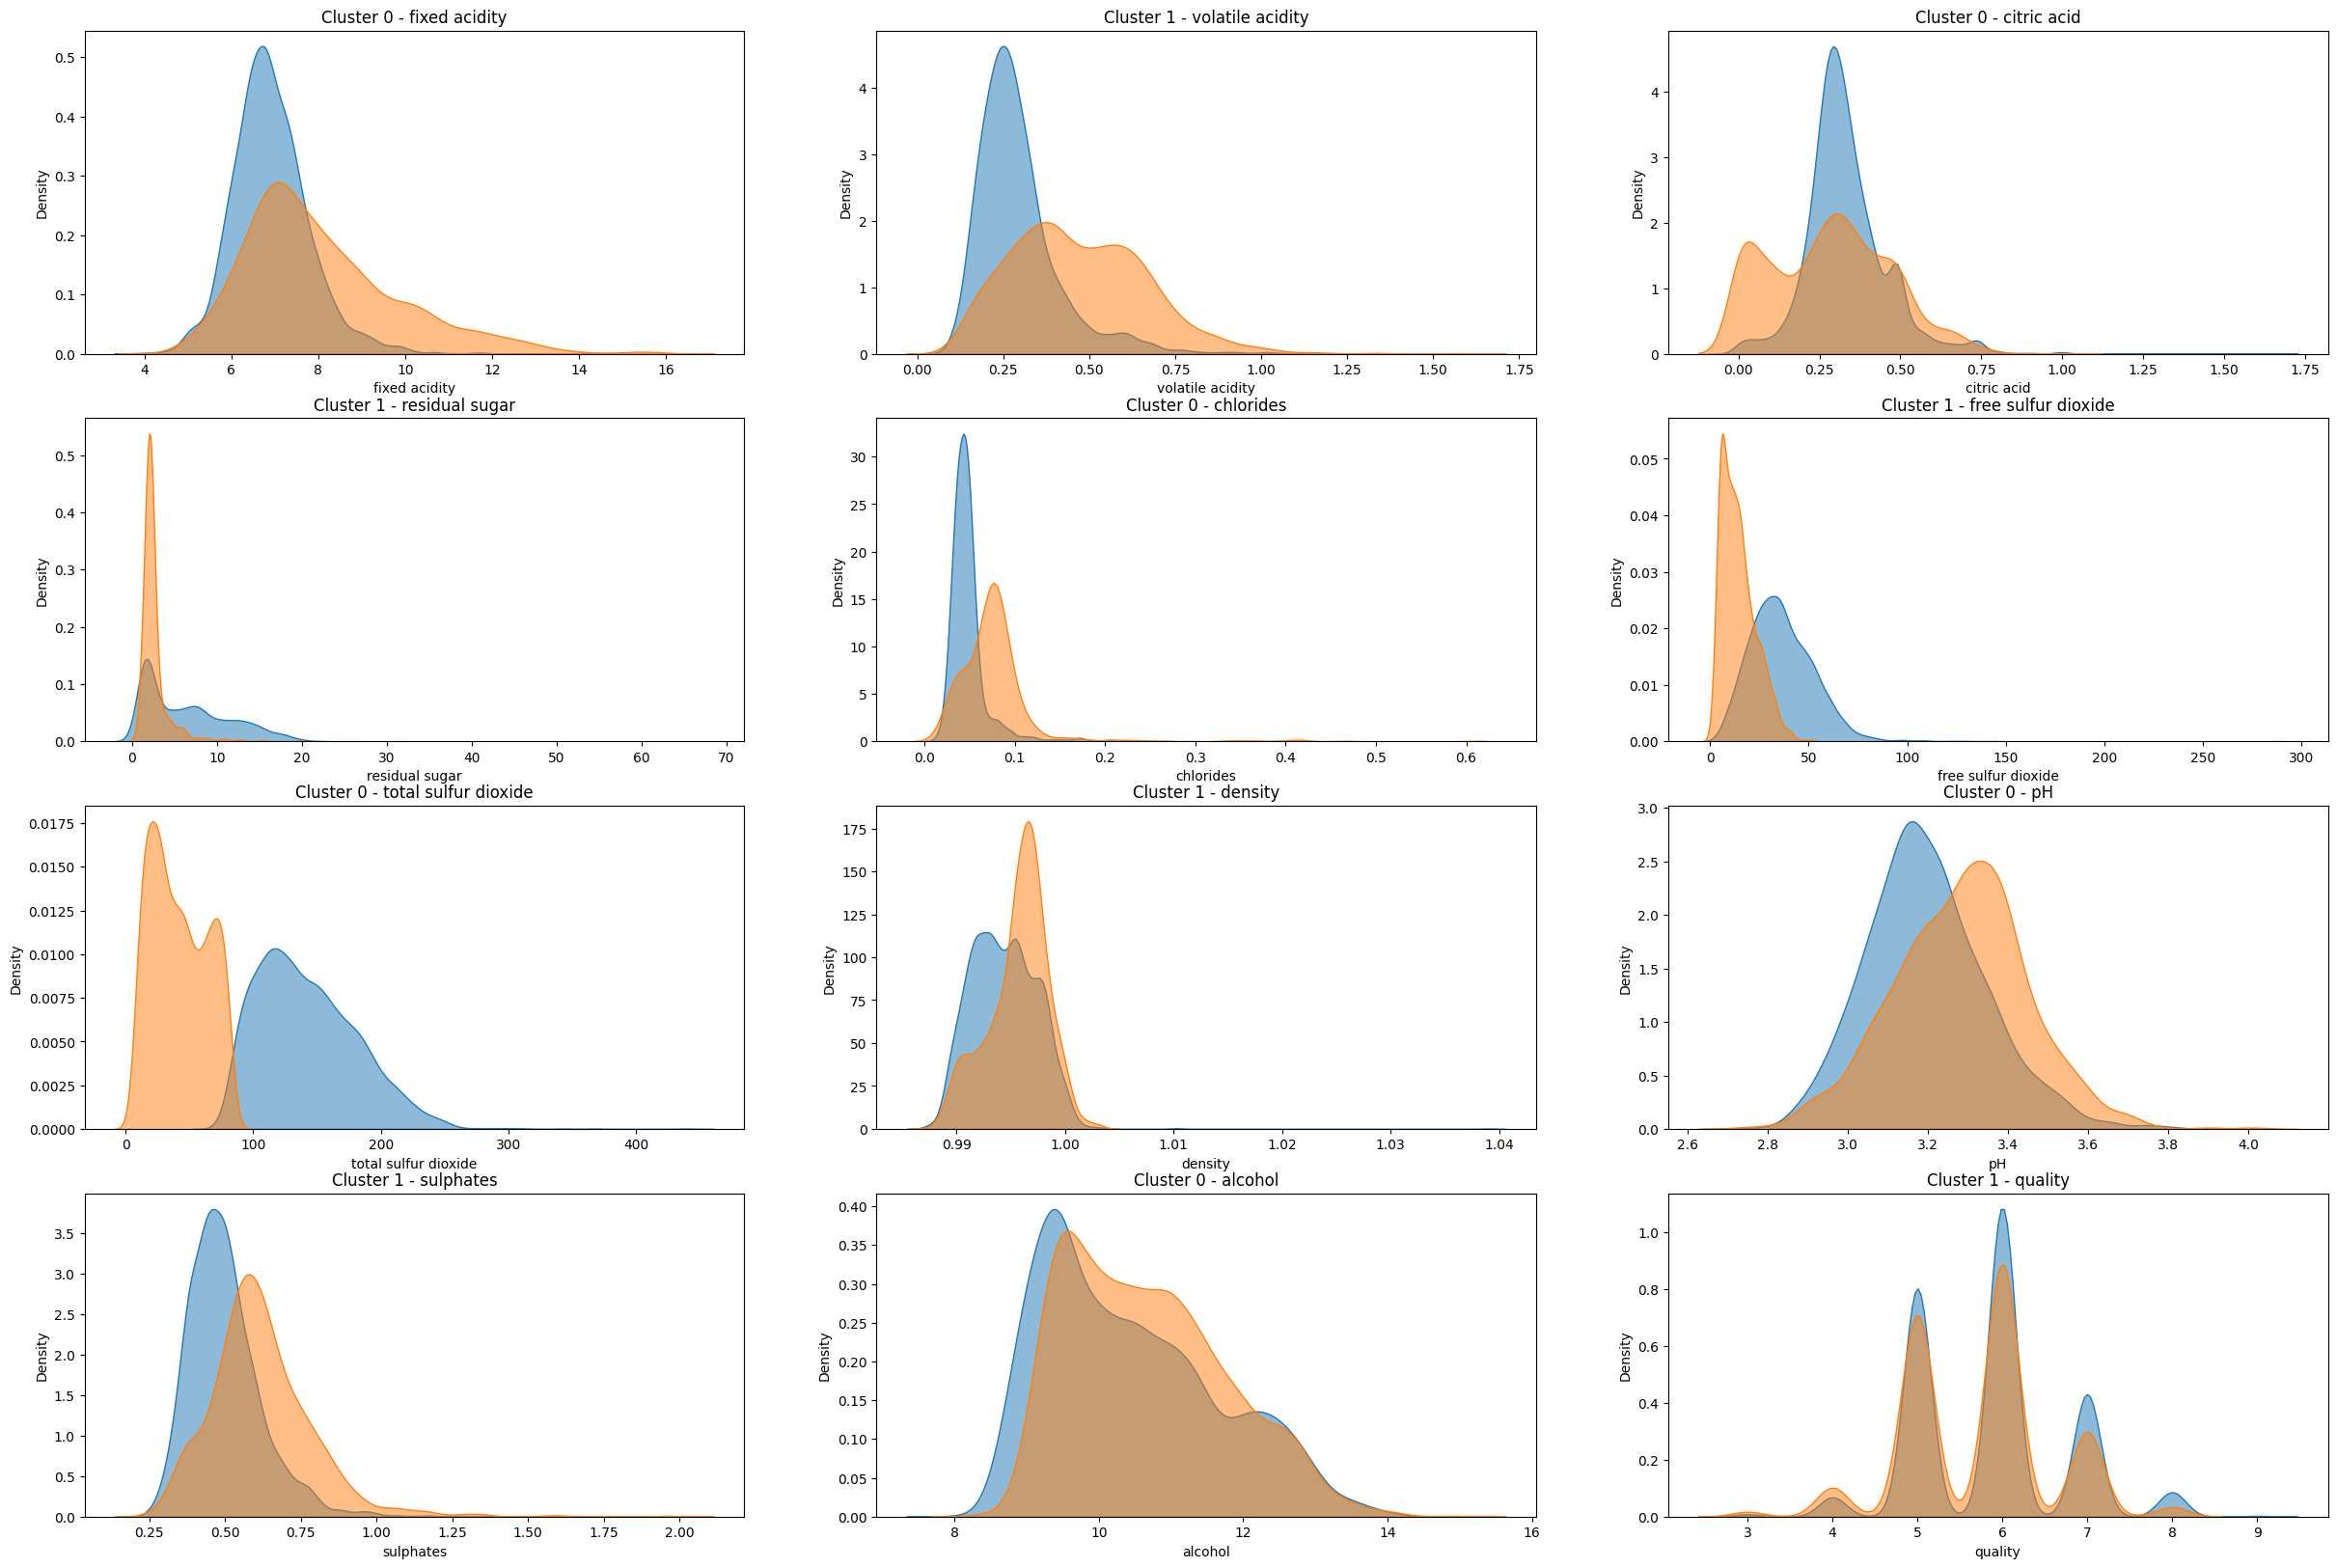

In [332]:
brc_labels = data.merge(pd.DataFrame({"Labels":birch.labels_}),left_index=True,right_index=True)

bins = 40
number_of_columns = len(brc_labels.columns)
number_of_clusters = 2

count = 1
plt.subplots(4,3,figsize=(30,20))

for i in range(number_of_columns - 1):
    for j in range(number_of_clusters):
        plt.subplot(4,3,count)
        sns.kdeplot(data=brc_labels.loc[brc_labels["Labels"]==j],x=brc_labels.columns[i], alpha=0.5, fill=True)
        plt.title(f"Cluster {(count-1)%number_of_clusters} - {brc_labels.columns[i]}")

    count += 1

Looking at the distribution for the clusters, we see that the only discriminatory variable here is total sulphur dioxide. Below are the scatterplots for all the variables against Total sulfur dioxide.

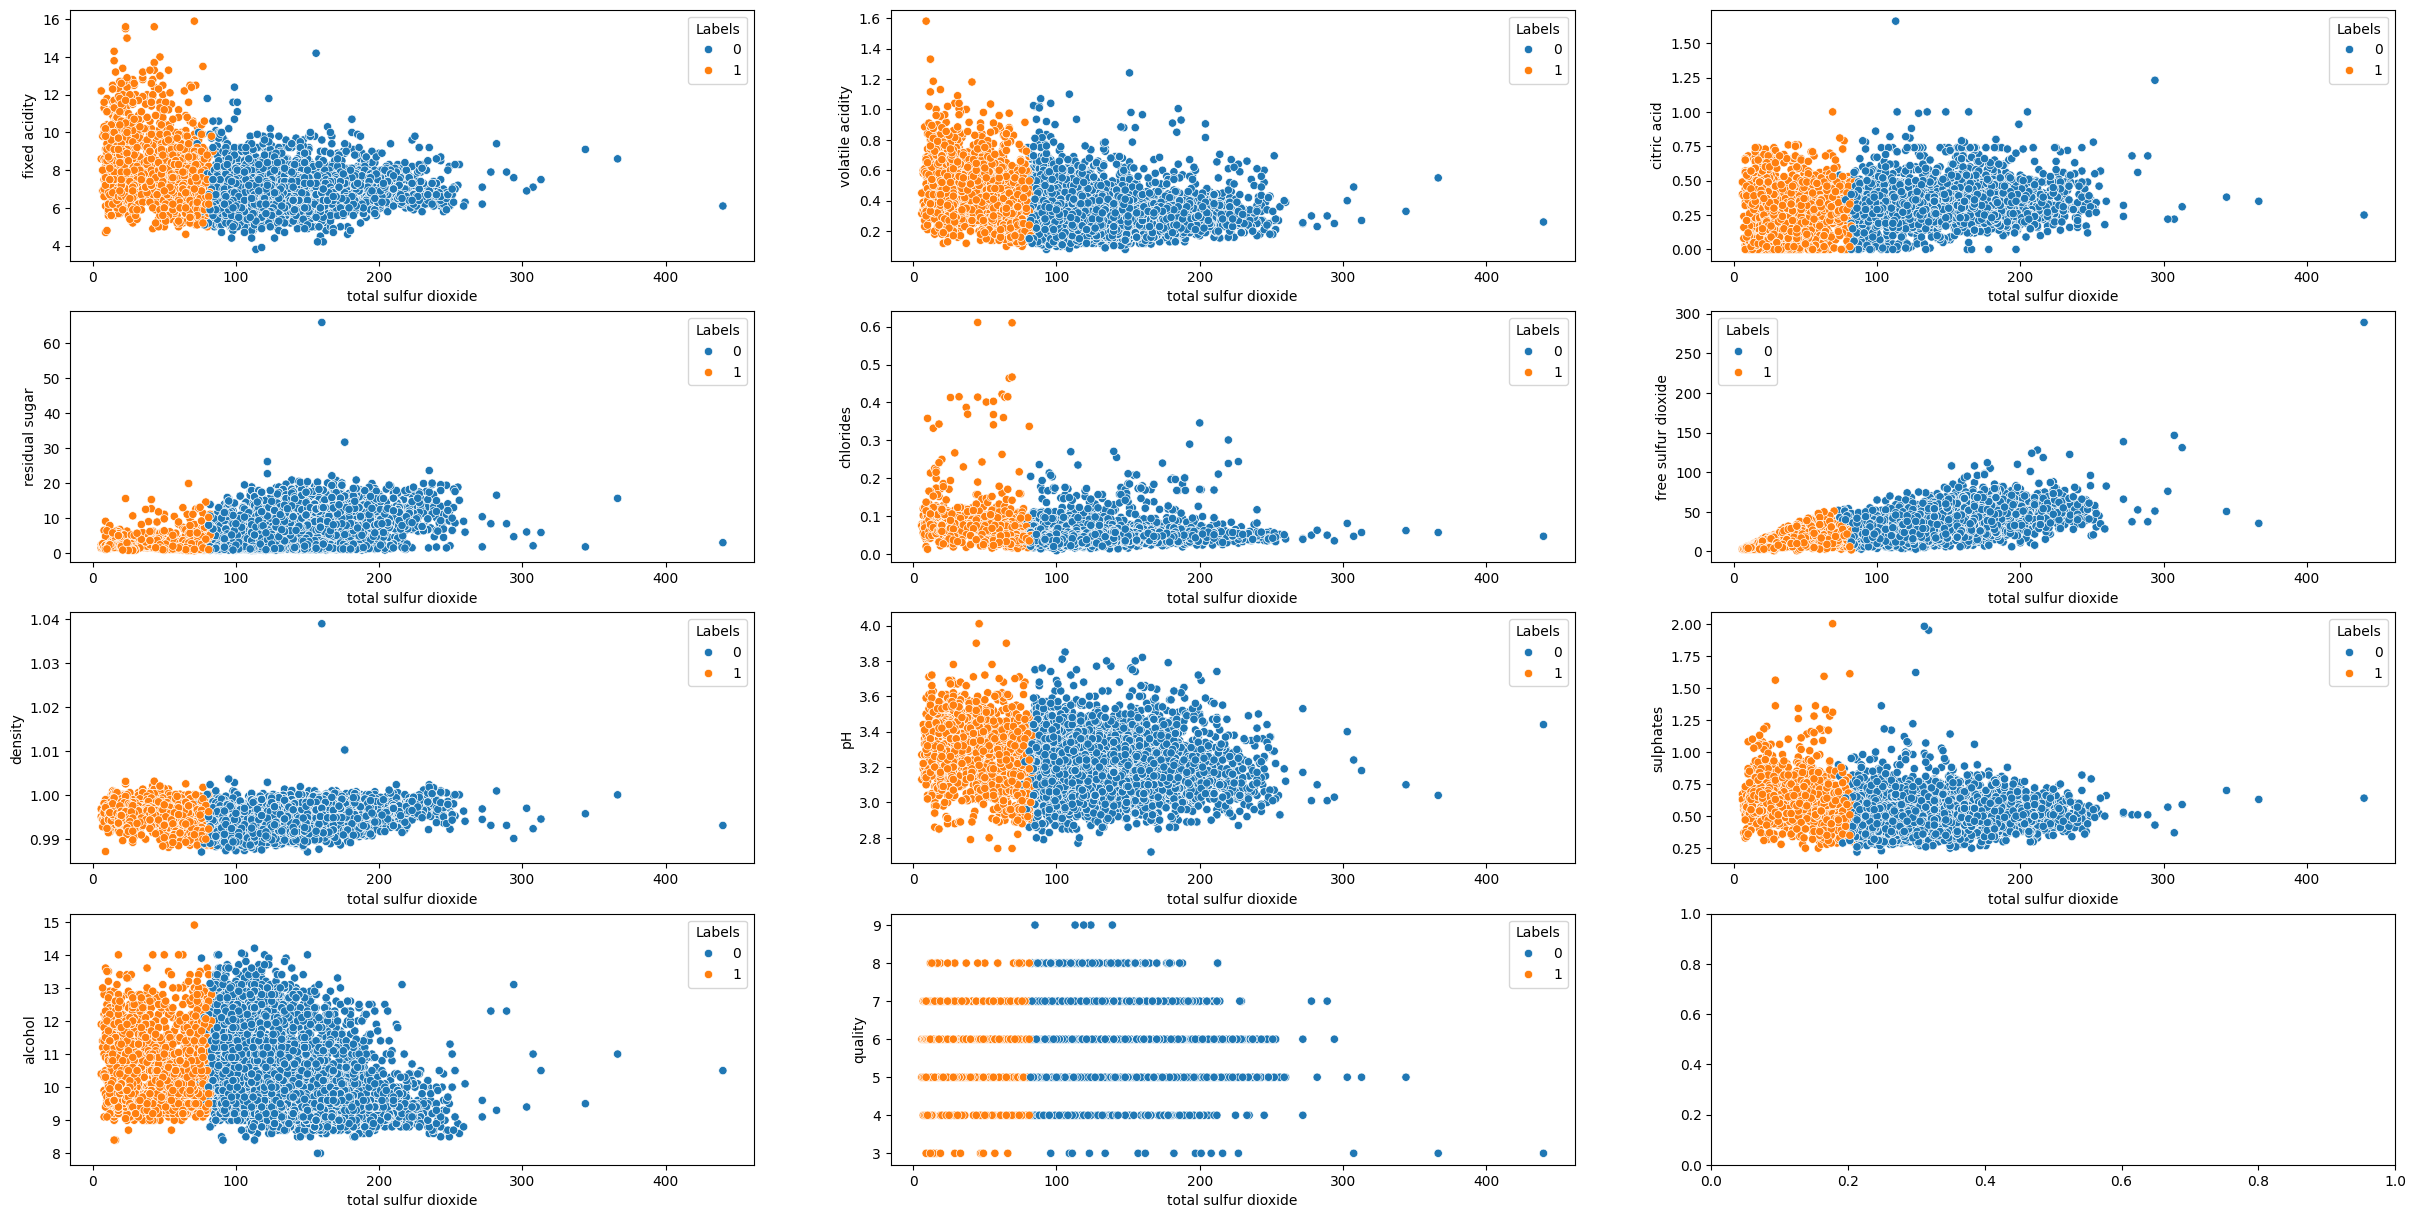

In [333]:
plt.subplots(4,3,figsize=(30,15))

count = 1
for i in range(number_of_columns - 1):
    if(brc_labels.columns[i] != "total sulfur dioxide"):
        plt.subplot(4,3,count)
        ax = sns.scatterplot(data=brc_labels, x="total sulfur dioxide", y=brc_labels.columns[i], hue="Labels")
        count += 1

Comparing K-means clustering with the BIRCH algorithm, we see that the optimal clusters for BIRCH is 2 and for K-means we found out that the optimal K is 3 using the elbow method. The scatterplots are plotted for the discriminatory variable which turned out to be **Total Sulfur dioxide** for both the algorithms. We see a clear clustering into the different groups from the scatterplots. Lets compare the model performance for both algorithms using silhouette scores.

In [334]:
Kmeans_score = silhouette_score(data, KMeans_model.labels_)
birch_score = silhouette_score(data, birch.labels_)

Kmeans_score, birch_score

(0.5039971096351341, 0.5230833007436122)

These are the silhouette scores for the two models. We can see that the score for the birch algorithm is slightly better performing.